# Importing Libraries

First we import the libraries necessary to analyze the data


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import utils as m

In [36]:
#load the cleaned data

incidents = pd.read_csv("../data/incidents_cleaned.csv", low_memory=False)
poverty = pd.read_csv("../data/poverty_cleaned.csv", low_memory=False)
districts = pd.read_csv("../data/districts_cleaned.csv", low_memory=False)

# and load our external data
population = pd.read_csv("../data/Population by Age and Sex - US, States, Counties.csv", low_memory=False)


In [37]:
incidents.info()
incidents = incidents.drop(
    columns=['participant_age1', 'participant_age_group1', 'participant_gender1', 'state_house_district',
             'state_senate_district', 'address'])
incidents.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191526 entries, 0 to 191525
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       191526 non-null  object 
 1   state                      191526 non-null  object 
 2   city_or_county             191526 non-null  object 
 3   address                    178077 non-null  object 
 4   latitude                   184147 non-null  float64
 5   longitude                  184147 non-null  float64
 6   congressional_district     180870 non-null  float64
 7   state_house_district       160517 non-null  float64
 8   state_senate_district      165901 non-null  float64
 9   participant_age1           147016 non-null  float64
 10  participant_age_group1     174409 non-null  object 
 11  participant_gender1        180045 non-null  object 
 12  min_age_participants       147020 non-null  float64
 13  avg_age_participants       14

,date,state,city_or_county,latitude,longitude,congressional_district,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,...,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2,year,month,day
0,2015-05-02,Indiana,Indianapolis,39.8322,-86.2492,7.0,19.0,19.0,19.0,0.0,...,1,0,0,1,teen wounded while walking - security guard at...,shot - wounded/injured,NaN,2015,5,2
1,2017-04-03,Pennsylvania,Kane,41.6645,-78.7856,5.0,62.0,62.0,62.0,0.0,...,0,0,0,1,shot self after accident,"shot - dead (murder, accidental, suicide)",suicide^,2017,4,3
2,2016-11-05,Michigan,Detroit,42.4190,-83.0393,14.0,NaN,NaN,NaN,NaN,...,1,0,1,2,1 inj.,shot - wounded/injured,NaN,2016,11,5
3,2016-10-15,District of Columbia,Washington,38.9030,-76.9820,1.0,NaN,NaN,NaN,0.0,...,1,0,0,2,NaN,shot - wounded/injured,NaN,2016,10,15
4,2014-01-18,North Carolina,Wayne County,35.1847,-77.9527,13.0,65.0,65.0,65.0,0.0,...,1,0,0,1,NaN,shot - wounded/injured,home invasion,2014,1,18


In [38]:
# evaluate how to handle the missing values for min_age_participants, max_age_participants and avg_age_participants
# try by replacing with the mean
age_columns = ['min_age_participants', 'max_age_participants', 'avg_age_participants']
mean_test = incidents.copy()
for column in age_columns:
    mean_test[column].fillna(incidents[column].mean(), inplace=True)

# try by replacing with the median
median_test = incidents.copy()
for column in age_columns:
    median_test[column].fillna(incidents[column].median(), inplace=True)

In [39]:
incidents[age_columns].describe()

,min_age_participants,max_age_participants,avg_age_participants
count,147020.000000,147017.000000,147016.000000
mean,28.343525,31.796411,29.999844
std,12.478546,13.689740,12.441338
min,0.000000,0.000000,0.000000
25%,20.000000,22.000000,21.000000
50%,25.000000,28.000000,27.000000
75%,34.000000,38.000000,36.000000
max,101.000000,101.000000,101.000000


In [40]:
mean_test[age_columns].describe()

,min_age_participants,max_age_participants,avg_age_participants
count,191526.000000,191526.000000,191526.000000
mean,28.343525,31.796411,29.999844
std,10.932966,11.994020,10.900218
min,0.000000,0.000000,0.000000
25%,21.000000,24.000000,23.000000
50%,28.343525,31.796411,29.999844
75%,30.000000,35.000000,32.000000
max,101.000000,101.000000,101.000000


In [41]:
median_test[age_columns].describe()

,min_age_participants,max_age_participants,avg_age_participants
count,191526.000000,191526.000000,191526.000000
mean,27.566571,30.914158,29.302690
std,11.023786,12.100725,10.973609
min,0.000000,0.000000,0.000000
25%,21.000000,24.000000,23.000000
50%,25.000000,28.000000,27.000000
75%,30.000000,35.000000,32.000000
max,101.000000,101.000000,101.000000


<Axes: xlabel='min_age_participants', ylabel='Count'>

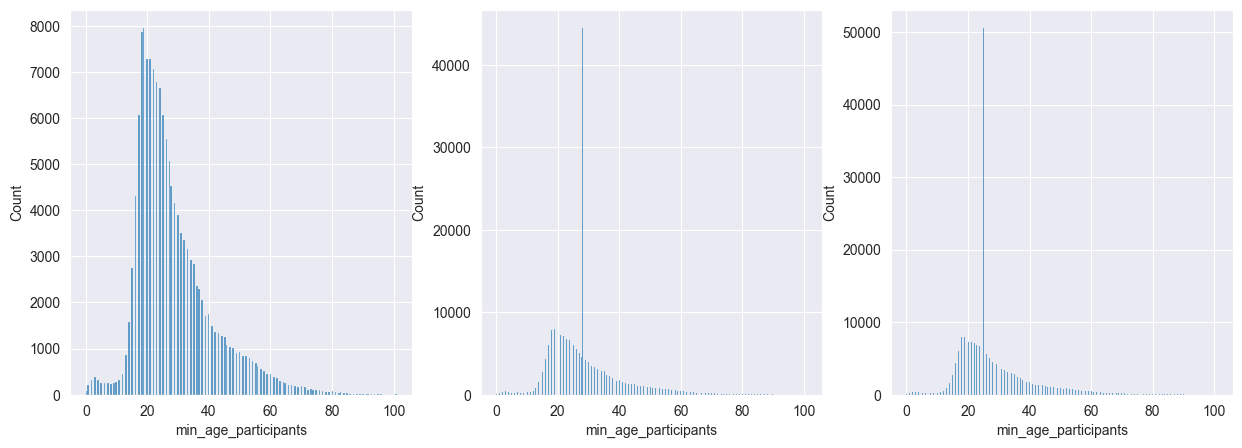

In [42]:
# evaluate the distribution between the three copies

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=incidents, x='min_age_participants', ax=axes[0])
sns.histplot(data=mean_test, x='min_age_participants', ax=axes[1])
sns.histplot(data=median_test, x='min_age_participants', ax=axes[2])

In [43]:
incidents['incident_characteristics1'].unique()

value_counts = incidents['incident_characteristics1'].value_counts(dropna=False)
print(value_counts)

incident_characteristics1
shot - wounded/injured                                                                                  83498
shot - dead (murder, accidental, suicide)                                                               42786
non-shooting incident                                                                                   33669
shots fired - no injuries                                                                               18184
institution/group/business                                                                               3370
armed robbery with injury/death and/or evidence of dgu found                                             3349
possession (gun(s) found during commission of other crimes)                                               997
brandishing/flourishing/open carry/lost/found                                                             929
drug involvement                                                                              

In [44]:
# Define the categories
# Define the categories including missing incident characteristics
category_mapping = {
    'Shooting Casualty Incidents': [
        'shot - wounded/injured', 'shot - dead (murder, accidental, suicide)',
        'armed robbery with injury/death and/or evidence of dgu found',
        'accidental shooting', 'drive-by (car to street, car to car)',
        'mass shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)',
        'officer involved incident', 'criminal act with stolen gun',
        'gun at school, no death/injury - elementary/secondary school',
        'bb/pellet/replica gun', 'gun shop robbery or burglary',
        'gun range/gun shop/gun show shooting'
    ],
    'Non-Fatal Shooting Incidents': [
        'shots fired - no injuries', 'shots fired, no action (reported, no evidence found)',
        'gun(s) stolen from owner'
    ],
    'Non-Shooting Gun-Related Incidents': [
        'institution/group/business', 'possession (gun(s) found during commission of other crimes)',
        'brandishing/flourishing/open carry/lost/found', 'drug involvement', 'home invasion',
        'atf/le confiscation/raid/arrest', 'animal shot/killed', 'car-jacking', 'gang involvement',
        'sex crime involving firearm', 'pistol-whipping', 'possession of gun by felon or prohibited person',
        'gun buy back action', 'suicide - attempt', 'implied weapon', 'defensive use', 'suicide^',
        'non-aggression incident', 'domestic violence', 'kidnapping/abductions/hostage', 'road rage',
        'bar/club incident - in or around establishment', 'murder/suicide',
        'lockdown/alert only: no gv incident occurred onsite', 'guns stolen from law enforcement',
        'stolen/illegally owned gun{s} recovered during arrest/warrant',
        'attempted murder/suicide (one variable unsuccessful)',
        'under the influence of alcohol or drugs (only applies to the subject/suspect/perpetrator)',
        'shotspotter', 'child involved incident', 'hate crime', 'house party',
        'spree shooting (multiple victims, multiple locations)', 'unlawful purchase/sale'
    ],
    # 'Unspecified or Miscellaneous Incidents' category includes NaN values
    'Unspecified or Miscellaneous Incidents': [np.nan]
}


# Function to map incident characteristics to category indices
def map_to_category(characteristic):
    for category, characteristics in category_mapping.items():
        if pd.isna(characteristic) and pd.isna(characteristics[0]):
            return list(category_mapping.keys()).index(category) + 1  # Adding 1 to start indexing from 1
        elif characteristic in characteristics:
            return list(category_mapping.keys()).index(category) + 1  # Adding 1 to start indexing from 1
    return 0  # 0 represents 'Unspecified or Miscellaneous Incidents'


# Apply the mapping function to create a new column 'category_index'
incidents['category_index'] = incidents['incident_characteristics1'].apply(map_to_category)
incidents.head()

,date,state,city_or_county,latitude,longitude,congressional_district,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,...,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2,year,month,day,category_index
0,2015-05-02,Indiana,Indianapolis,39.8322,-86.2492,7.0,19.0,19.0,19.0,0.0,...,0,0,1,teen wounded while walking - security guard at...,shot - wounded/injured,NaN,2015,5,2,1
1,2017-04-03,Pennsylvania,Kane,41.6645,-78.7856,5.0,62.0,62.0,62.0,0.0,...,0,0,1,shot self after accident,"shot - dead (murder, accidental, suicide)",suicide^,2017,4,3,1
2,2016-11-05,Michigan,Detroit,42.4190,-83.0393,14.0,NaN,NaN,NaN,NaN,...,0,1,2,1 inj.,shot - wounded/injured,NaN,2016,11,5,1
3,2016-10-15,District of Columbia,Washington,38.9030,-76.9820,1.0,NaN,NaN,NaN,0.0,...,0,0,2,NaN,shot - wounded/injured,NaN,2016,10,15,1
4,2014-01-18,North Carolina,Wayne County,35.1847,-77.9527,13.0,65.0,65.0,65.0,0.0,...,0,0,1,NaN,shot - wounded/injured,home invasion,2014,1,18,1


In [45]:
# we can now drop the incident_characteristics1, incident_characteristics2 and notes columns

incidents = incidents.drop(columns=['incident_characteristics1', 'incident_characteristics2', 'notes'])

In [46]:
incidents_and_poverty = pd.merge(incidents, poverty, on=['state', 'year'], how='inner')
incidents_and_poverty = incidents_and_poverty[['state', 'year', 'date', 'povertyPercentage']]


In [47]:
population = population[(population['Countyfips'] == 0) & (population['Year'] <= 2018) & (population['Year'] > 2013)]
population = population.drop(
    columns=['IBRC_Geo_ID', 'Statefips', 'Countyfips', 'Population 0-4', 'Population 5-17', 'Population 18-24',
             'Population 25-44', 'Population 45-64', 'Population 65+'])
population = population.rename(columns={'Description': 'state', 'Year': 'year'})

In [48]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 14 to 63880
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                265 non-null    object 
 1   year                 265 non-null    int64  
 2   Total Population     265 non-null    float64
 3   Population Under 18  265 non-null    float64
 4   Population 18-54     265 non-null    float64
 5   Population 55+       265 non-null    float64
 6   Male Population      265 non-null    float64
 7   Female Population    265 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 18.6+ KB


In [49]:
# merge the population data with the incidents data

# Group incidents by year and state, calculate incident counts
incident_counts = incidents.groupby(['year', 'state']).size().reset_index(name='counts')

# Group population by year and state, summing the population
population_totals = population.groupby(['year', 'state'])['Total Population'].sum().reset_index()

# Merge incident counts and population totals on year and state
merged_data = pd.merge(incident_counts, population_totals, on=['year', 'state'], how='inner')

# Calculate Incident Density per 100k
merged_data['Incident Density per 100k'] = (merged_data['counts'] / merged_data['Total Population']) * 100000

# Append U.S. totals for each year
us_totals = merged_data.groupby('year').agg({'counts': 'sum', 'Total Population': 'sum'}).reset_index()
us_totals['state'] = 'U.S.'
us_totals['Incident Density per 100k'] = (us_totals['counts'] / us_totals['Total Population']) * 100000

# Append U.S. totals to the merged data
result = pd.concat([merged_data, us_totals]).reset_index(drop=True)[['year', 'state', 'Incident Density per 100k']]

incidents_density = pd.merge(incidents, result, on=['state', 'year'], how='inner')

In [50]:
incidents_density

,date,state,city_or_county,latitude,longitude,congressional_district,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,...,n_killed,n_injured,n_arrested,n_unharmed,n_participants,year,month,day,category_index,Incident Density per 100k
0,2015-05-02,Indiana,Indianapolis,39.8322,-86.2492,7.0,19.0,19.0,19.0,0.0,...,0,1,0,0,1,2015,5,2,1,13.755175
1,2015-08-02,Indiana,Gary,41.5981,-87.3400,1.0,15.0,15.0,15.0,0.0,...,1,0,0,0,1,2015,8,2,1,13.755175
2,2015-12-18,Indiana,Evansville,37.9774,-87.5372,8.0,24.0,24.0,24.0,0.0,...,0,0,1,0,1,2015,12,18,0,13.755175
3,2015-05-14,Indiana,Gary,41.5982,-87.3488,1.0,32.0,46.0,59.0,0.0,...,1,0,0,1,2,2015,5,14,1,13.755175
4,2015-12-26,Indiana,Muncie,40.1978,-85.3914,6.0,24.0,24.0,24.0,0.0,...,0,1,0,0,1,2015,12,26,1,13.755175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191521,2018-03-24,Hawaii,Wailuku,NaN,NaN,NaN,26.0,26.0,26.0,0.0,...,0,0,1,0,1,2018,3,24,4,1.196683
191522,2018-01-07,Hawaii,Pahala,19.2000,-155.4800,2.0,33.0,33.0,33.0,0.0,...,0,0,1,0,1,2018,1,7,2,1.196683
191523,2018-03-05,Hawaii,Ocean View,19.1127,-155.7570,2.0,31.0,42.0,64.0,0.0,...,0,2,1,0,3,2018,3,5,1,1.196683
191524,2018-01-28,Hawaii,Waianae,21.4444,-158.1860,2.0,34.0,34.0,34.0,0.0,...,0,0,1,0,1,2018,1,28,2,1.196683


In [51]:
# save incidents_density to csv
incidents_density.to_csv("../data/extracted_features.csv", index=False)

In [52]:
# TODO make sure the cleaning is the same
def preparing_df(df, df2, df3, df4, df5):
    df = df.drop(columns=['address', 'state_house_district', 'state_senate_district', 'participant_age1',
                          'participant_age_group1', 'participant_gender1'])
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df = df.drop(columns=['date'])
    df = df[(df['year'] > 2013) & (df['year'] < 2019)]
    # controlli semantici
    cols = ['min_age_participants', 'max_age_participants', 'avg_age_participants', 'n_participants_child',
            'n_participants_teen', 'n_participants_adult']
    df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
    df['max_age_participants'] = np.where((df['max_age_participants'] < 0) | (df['max_age_participants'] > 115), np.nan,
                                          df['max_age_participants'])
    df['min_age_participants'] = np.where((df['min_age_participants'] < 0) | (df['min_age_participants'] > 115), np.nan,
                                          df['min_age_participants'])
    df['avg_age_participants'] = np.where((df['avg_age_participants'] < 0) | (df['avg_age_participants'] > 115), np.nan,
                                          df['avg_age_participants'])
    df['n_participants_child'] = np.where(
        (df['n_participants_child'] < 0) | (df['n_participants_child'] > df['n_participants']), np.nan,
        df['n_participants_child'])
    df['n_participants_teen'] = np.where(
        (df['n_participants_teen'] < 0) | (df['n_participants_teen'] > df['n_participants']), np.nan,
        df['n_participants_teen'])
    df['n_participants_adult'] = np.where(
        (df['n_participants_adult'] < 0) | (df['n_participants_adult'] > df['n_participants']), np.nan,
        df['n_participants_adult'])
    df['longitude'] = np.where(df['longitude'] > 0, df['longitude'] * -1, df['longitude'])
    #21968 = San Bernardino shooting
    #88653 = Florida school shooting
    #116161 = Colorado, gangs
    #180038 = Boston, gangs
    #152656 = Texas church shooting
    #236261 = Orlando shooting
    df = df.drop([21968, 88653, 116161, 180038, 152656, 236261])
    df2 = df2[(df2['year'] > 2013) & (df2['year'] < 2019)]
    df3 = df3[(df3['year'] > 2013) & (df3['year'] < 2019)]
    df3['state'] = df3['state'].str.title()
    df4 = df4[(df4['Countyfips'] == 0) & (df4['Year'] > 2013) & (df4['Year'] < 2019)]
    df4 = df4.drop(
        columns=['IBRC_Geo_ID', 'Statefips', 'Countyfips', 'Population 0-4', 'Population 5-17', 'Population 18-24',
                 'Population 25-44', 'Population 45-64', 'Population 65+'])
    df4 = df4.rename(columns={'Year': 'year', 'Description': 'state'})

    return df, df2, df3, df4, df5

# Feature Extraction
We extract the following features from the datasets:

- **crime_to_poverty**: the ratio between the number of crimes and the number of people living in poverty
- **average_age**: the average age of the participants
- **average_participants**: the average number of participants
- **involved**: the number of participants involved in the incident
- **minors_percentage**: the percentage of minors involved in the incident
- **par_to_pop**: the ratio between the number of participants and the population
- **ktp**: the number of participants killed
- **mtp**: the number of participants injured
- **ftp**: the number of participants killed by firearm
- **atp**: the number of participants injured by firearm
- **utp**: the number of participants killed by firearm under 18
- **itp**: the number of participants injured by firearm under 18
- **num_minors**: the number of minors involved in the incident
- **teen_to_m**: ratio between the number of teen participants and the male participants
- **teen_to_f**: ratio between the number of teen participants and the female participants 

In [53]:
from feature_extractors import *

df = incidents
df2 = poverty
df3 = districts
df4 = population

In [54]:
df = crime_to_poverty(df, df2)

In [55]:
df = average_age(df)

In [56]:
df = average_participants(df)

In [57]:
df = involved(df)

In [58]:
df = minors_percentage(df, df4)

In [59]:
df = par_to_pop(df, df4)

In [60]:
df = ktp(df)
df = mtp(df)
df = ftp(df)
df = atp(df)
df = utp(df)
df = itp(df)

In [61]:
df = num_minors(df)
df = teen_to_m(df)
df = teen_to_f(df)
df = ratio_par_to_total(df)

C:\Users\Hp\Desktop\DataMining\TASK_1\feature_extractors.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_involved['year'] = x
C:\Users\Hp\Desktop\DataMining\TASK_1\feature_extractors.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_involved['month'] = y
C:\Users\Hp\Desktop\DataMining\TASK_1\feature_extractors.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [62]:
df

,date,state,city_or_county,latitude,longitude,congressional_district,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,...,kil_to_p,man_to_p,fem_to_p,arr_to_p,unh_to_p,inj_to_p,n_minors,teen_to_m,teen_to_f,par_to_tot
0,2015-05-02,Indiana,Indianapolis,39.8322,-86.2492,7.0,19.0,19.0,19.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.008696
1,2015-05-14,Indiana,Gary,41.5982,-87.3488,1.0,32.0,46.0,59.0,0.0,...,0.5,1.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.017391
2,2015-05-06,Indiana,Bloomington,39.1593,-86.5272,9.0,22.0,22.0,23.0,0.0,...,0.0,0.5,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.017391
3,2015-05-15,Indiana,Gary,41.6123,-87.2685,1.0,25.0,25.0,25.0,0.0,...,0.0,1.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.017391
4,2015-05-16,Indiana,Gary,41.5918,-87.2895,1.0,22.0,24.0,25.0,0.0,...,0.5,1.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.017391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195195,2018-01-11,Hawaii,Eleele,21.9007,-159.6040,NaN,38.0,38.0,38.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.125000
195196,2018-01-09,Hawaii,Pahoa,NaN,NaN,NaN,51.0,51.0,51.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000
195197,2018-01-07,Hawaii,Pahala,19.2000,-155.4800,2.0,33.0,33.0,33.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.125000
195198,2018-01-28,Hawaii,Waianae,21.4444,-158.1860,2.0,34.0,34.0,34.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.125000


<Axes: >

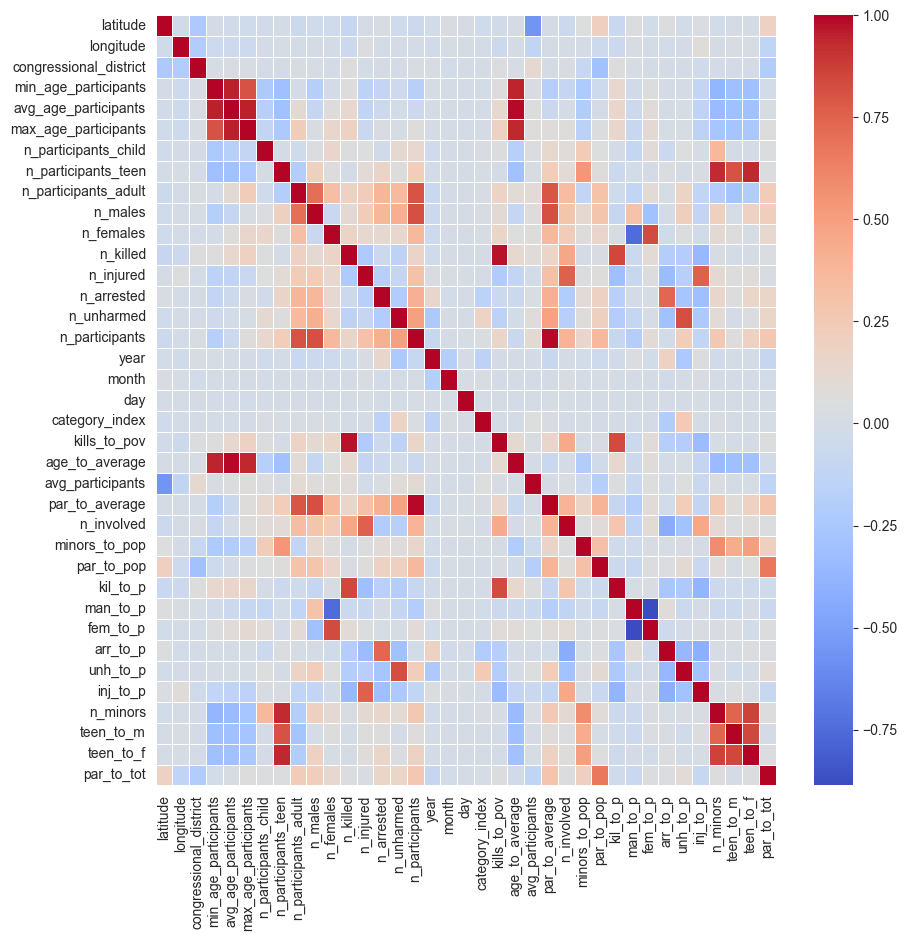

In [63]:
correlation_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=.5)

In [0]:
# drop highly correlated features
df=df.drop(columns=['min_age_participants', 'max_age_participants']) # highly correlated with avg_age_participants
df=df.drop(columns=['n_participants_teen', 'teen_to_f', 'teen_to_m']) # highly correlated with n_minors

In [68]:
df.describe()

,latitude,longitude,congressional_district,avg_age_participants,n_participants_child,n_participants_adult,n_males,n_females,n_killed,n_injured,...,minors_to_pop,par_to_pop,kil_to_p,man_to_p,fem_to_p,arr_to_p,unh_to_p,inj_to_p,n_minors,par_to_tot
count,187639.000000,187639.000000,184348.000000,149222.000000,177401.000000,177401.000000,183221.000000,183221.000000,195200.000000,195200.000000,...,177401.000000,195200.000000,195200.000000,183221.000000,183221.000000,195200.000000,195200.000000,195200.000000,177401.000000,195200.000000
mean,37.599566,-89.412198,7.940504,30.002620,0.024104,1.533368,1.516933,0.213218,0.297193,0.543770,...,0.012004,0.032304,0.183348,0.864441,0.103873,0.284958,0.199051,0.331798,0.162750,0.013294
std,5.070113,14.280145,8.400119,12.444171,0.185387,1.037914,0.968573,0.487495,0.539132,0.732454,...,0.062276,0.049796,0.339980,0.266598,0.243349,0.402134,0.340781,0.413369,0.502099,0.025509
min,19.111400,-171.429000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.002534,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001140
25%,33.956900,-93.989500,2.000000,21.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.009540,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003774
50%,38.631400,-86.653900,5.000000,27.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.017215,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006826
75%,41.467550,-80.059700,10.000000,36.000000,0.000000,2.000000,2.000000,0.000000,1.000000,1.000000,...,0.000000,0.034050,0.250000,1.000000,0.000000,0.500000,0.500000,0.666667,0.000000,0.013514
max,71.336800,-67.271100,53.000000,101.000000,7.000000,33.000000,29.000000,18.000000,17.000000,25.000000,...,3.158360,1.853048,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.000000,1.000000


<Axes: >

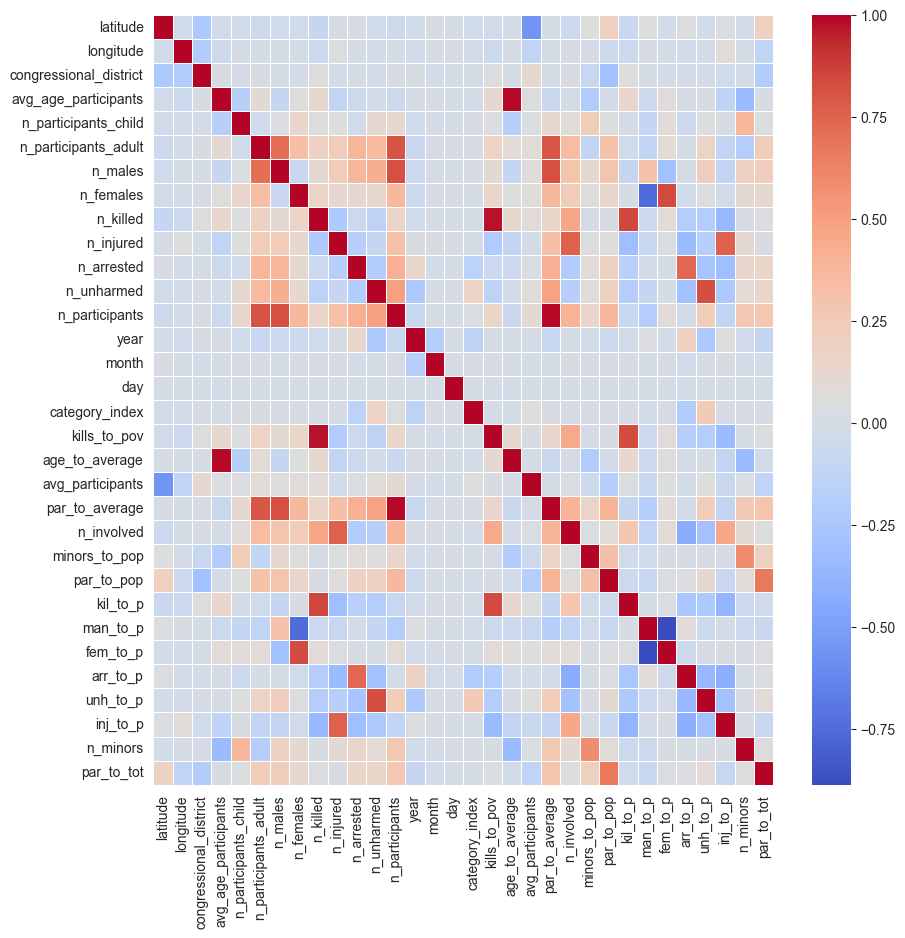

In [69]:
correlation_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.1f', linewidths=.5)

In [66]:
df.to_csv("../data/extracted_features.csv", index=False)